In [1]:
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# We will be using the Iris Plants Database
from sklearn.datasets import load_iris

SEED = 2017

In [2]:
# The first two classes (Iris-Setosa and Iris-Versicolour) are linear separable
iris = load_iris()
idxs = np.where(iris.target<2)
X = iris.data[idxs]
y = iris.target[idxs]

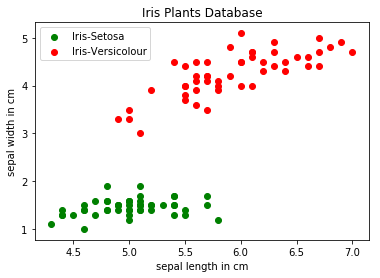

In [7]:
plt.scatter(X[y==0][:,0],X[y==0][:,2], color='green', label='Iris-Setosa')
plt.scatter(X[y==1][:,0],X[y==1][:,2], color='red', label='Iris-Versicolour')
plt.title('Iris Plants Database')
plt.xlabel('sepal length in cm')
plt.ylabel('sepal width in cm')
plt.legend()
plt.show()

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [9]:
weights = np.random.normal(size=X_train.shape[1])
bias = 1

In [10]:
learning_rate = 0.1
n_epochs = 15

In [11]:
del_w = np.zeros(weights.shape)
hist_loss = []
hist_accuracy = []

for i in range(n_epochs):
    # We apply a simple step function, if the output is > 0.5 we predict 1, else 0
    output = np.where((X_train.dot(weights)+bias)>0.5, 1, 0)

    # Compute MSE
    error = np.mean((y_train-output)**2)

    # Update weights and bias
    weights-= learning_rate * np.dot((output-y_train), X_train)
    bias += learning_rate * np.sum(np.dot((output-y_train), X_train))

    # Calculate MSE
    loss = np.mean((output - y_train) ** 2)
    hist_loss.append(loss)

    # Determine validation accuracy
    output_val = np.where(X_val.dot(weights)>0.5, 1, 0)
    accuracy = np.mean(np.where(y_val==output_val, 1, 0))
    hist_accuracy.append(accuracy)

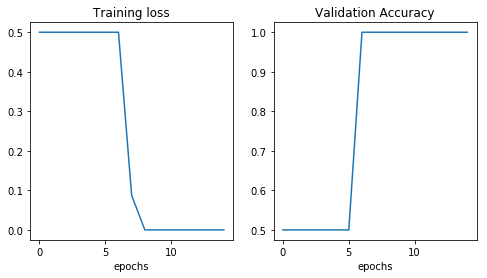

In [12]:
fig = plt.figure(figsize=(8, 4))
a = fig.add_subplot(1,2,1)
imgplot = plt.plot(hist_loss)
plt.xlabel('epochs')
a.set_title('Training loss')

a=fig.add_subplot(1,2,2)
imgplot = plt.plot(hist_accuracy)
plt.xlabel('epochs')
a.set_title('Validation Accuracy')
plt.show()